# Stock price from CSV

This notebooks download public stock price data
develop trading strategy

In [1]:
# enable inline plot. use pandas to read file from atlantis.csv located in data folder. show sample data
%matplotlib inline
import pandas as pd
df = pd.read_csv('../data/atlantis.csv')
df.dtypes

year          int64
population    int64
dtype: object

intercept: [-2162907.90513834]


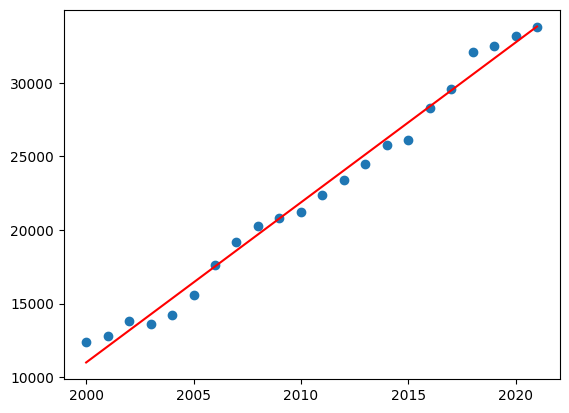

R value: 0.9940615743341035
p value: 9.603907565518933e-21


In [2]:
# create linear regression model using scikit-learn. use year as x-axis and population as y-axis
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['year']], df[['population']])
print('intercept:', model.intercept_)

# plot the data and the regression line
import matplotlib.pyplot as plt
plt.scatter(df[['year']], df[['population']])
plt.plot(df[['year']], model.predict(df[['year']]), color='red')
plt.show()

# print R value and p value
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df[['year']].values.flatten(), df[['population']].values.flatten())
print('R value:', r_value)
print('p value:', p_value)








In [30]:
# create a dataframe df2, one column is date, one column is population. 
# generate all the dates from smallest year in df to maximum year in df, assign to date column
# for each date, find the year, find the population of that year in df, 
# generate random value, it should be smaller than found population divided by 365, 
# assign to population column
# print sample data 
# print df2 data type

import numpy as np
import datetime
df2 = pd.DataFrame()
df2['date'] = pd.date_range(start=str(df['year'].min()), end=str(df['year'].max()), freq='D')

df2['year'] = df2['date'].dt.year
# change date to datetime.date
df2['date'] = df2['date'].apply(lambda x: x.date())
# create an index with date column, assing to df2
df2.index = df2['date']

# change date to data type that is fit into linear regression model
df2['date'] = df2['date'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d').toordinal())
df2['population'] = df2.apply(lambda row: np.random.randint(0, df[df['year'] == row['year']]['population'].values[0] / 365), axis=1)
df2



,date,year,population
date,,,
2000-01-01,730120,2000,3
2000-01-02,730121,2000,15
2000-01-03,730122,2000,5
2000-01-04,730123,2000,14
2000-01-05,730124,2000,1
...,...,...,...
2020-12-28,737787,2020,26
2020-12-29,737788,2020,48
2020-12-30,737789,2020,2


intercept: [-2273.05213149]


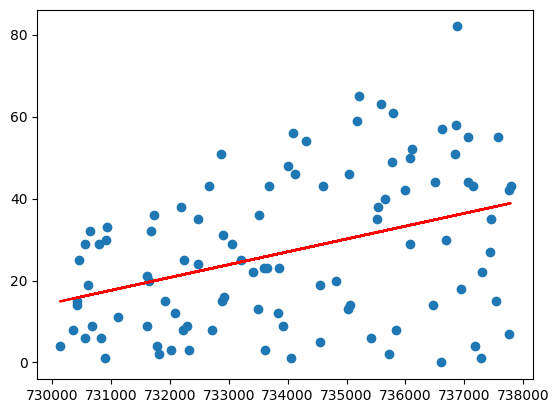

In [24]:
# repeat cell 3 with df2, instead of using column year, use column date
model = LinearRegression()
model.fit(df2[['date']], df2[['population']])
print('intercept:', model.intercept_)
plt.scatter(df2[['date']], df2[['population']])
plt.plot(df2[['date']], model.predict(df2[['date']]), color='red')
plt.show()


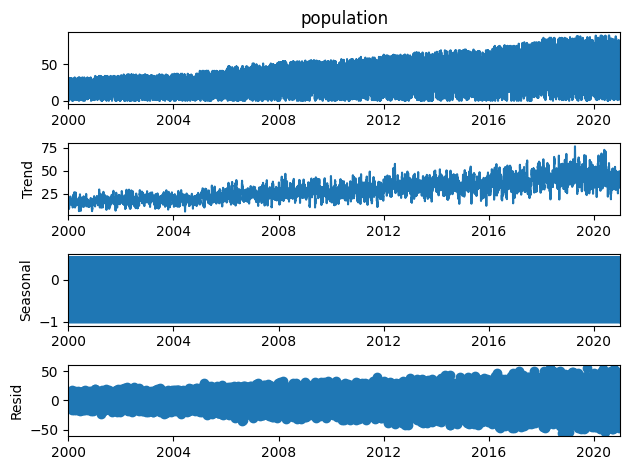

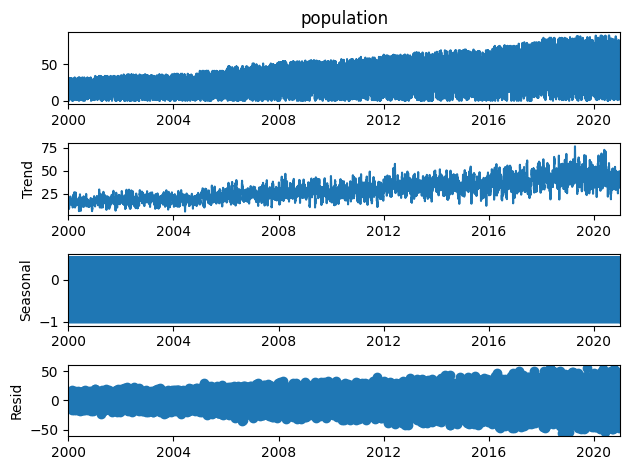

In [31]:
# use statsmodels library to do seasonal analysis, 
# set frequency index to df2
# show data sample
# select correct parameter for seasonal_decompose
# plot results
from statsmodels.tsa.seasonal import seasonal_decompose
df2.index = pd.DatetimeIndex(df2.index.values)
result = seasonal_decompose(df2['population'], model='additive')
result.plot()